In [21]:
import sys
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

sys.path.append(os.path.abspath(os.path.join("..", "src")))

df = pd.read_csv('../Data/Processed/hotel_clean3.csv')

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved,total_nights,total_people,price_per_person,is_family,stay_duration_flag,lead_time_category_8-30j,lead_time_category_31-90j,lead_time_category_91-180j,lead_time_category_181j+
0,2,0,1,2,0,224,2017,10,2,0,...,1,3,2,32.50,0,0,False,False,False,True
1,2,0,2,3,0,5,2018,11,6,0,...,1,5,2,53.34,0,0,False,False,False,False
2,1,0,2,1,0,1,2018,2,28,0,...,1,3,1,60.00,0,0,False,False,False,False
3,2,0,0,2,0,211,2018,5,20,0,...,1,2,2,50.00,0,0,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,...,1,2,2,47.25,0,0,False,True,False,False


In [22]:

from sklearn.model_selection import train_test_split

# critères de base
features = [
    'no_of_special_requests', 'price_per_person',
    'required_car_parking_space','total_people',
    'room_type_reserved', 'repeated_guest', 'no_of_previous_cancellations',
    'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
    'market_segment_type_Online', 'is_family', 'stay_duration_flag', 'lead_time_category_181j+', 'lead_time_category_91-180j', 'lead_time_category_31-90j', 'lead_time_category_8-30j'
]
x = df[features]
# Critère à prédire
y = df['booking_status_Not_Canceled']


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
model = DecisionTreeClassifier(max_depth=11)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11)

Accuracy sur les données de test :  0.83
Score moyen par validation croisée :  0.83
Précision :  0.85
Rappel :  0.91
Erreur quadratique moyenne :  0.168
Accuracy (via accuracy_score) :  0.832
Matrice de confusion :
 [[1378  636]
 [ 357 3538]]


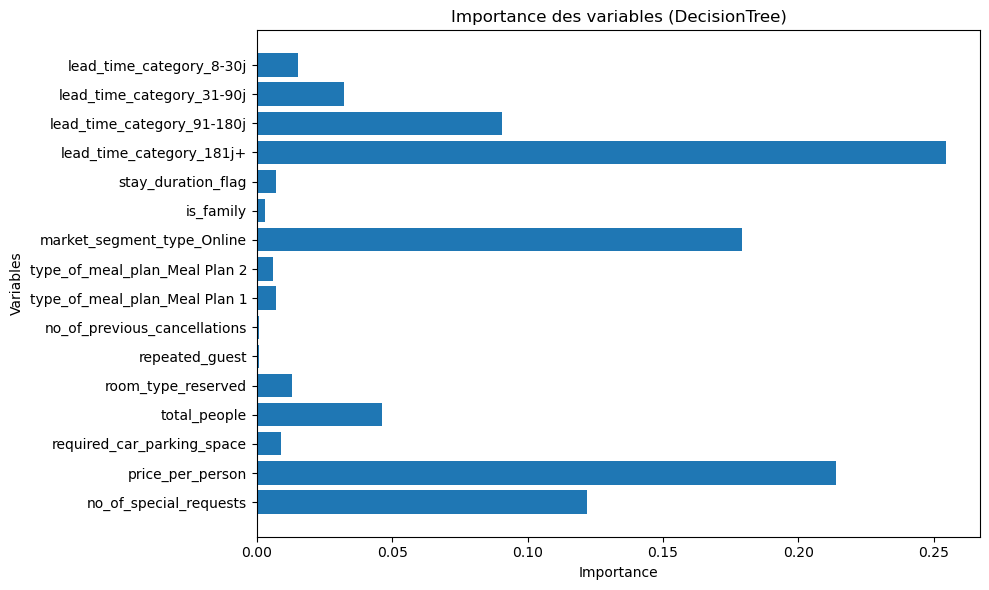

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# DecisionTree

# 6. Prédictions
y_pred = model.predict(x_test)

# 7. Évaluation
print("Accuracy sur les données de test : ", np.round(model.score(x_test, y_test), 2)) # 0.86
print("Score moyen par validation croisée : ",
      np.round(np.mean(cross_val_score(model, x, y, cv=5)), 2)) # 0.86
print("Précision : ", np.round(precision_score(y_test, y_pred), 2)) # 0.87
print("Rappel : ", np.round(recall_score(y_test, y_pred), 2)) # 0.93
print("Erreur quadratique moyenne : ", np.round(mean_squared_error(y_test, y_pred), 4)) # 0.1388
print("Accuracy (via accuracy_score) : ", np.round(accuracy_score(y_test, y_pred), 4)) # 0.8612

# 8. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)
#   [[1467  547]
#   [ 273 3622]]
# 9. Importance des variables
importances = model.feature_importances_
features = x_train.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Importance des variables (DecisionTree)")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


📷 Graphique sauvegardé dans : rfr_predict_errorDecisionTree.png


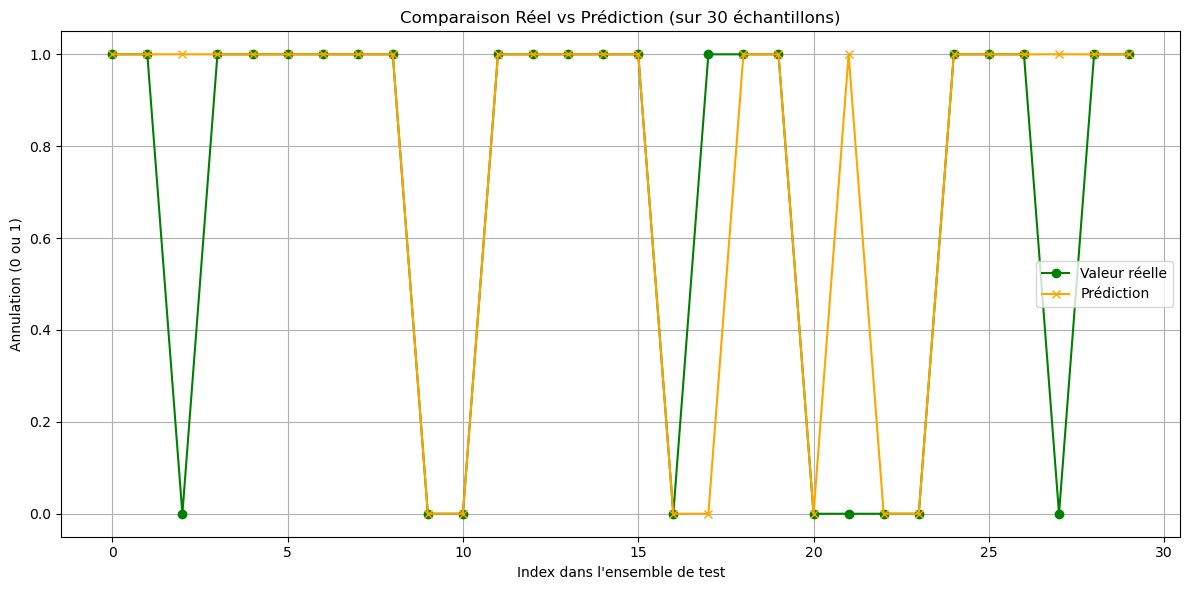

In [26]:
from graph_utils import display_predict_diff_errors2
display_predict_diff_errors2(y_test, y_pred, n=30, save_path="rfr_predict_errorDecisionTree.png")